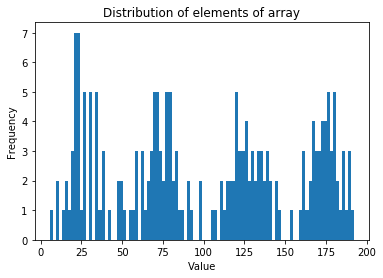

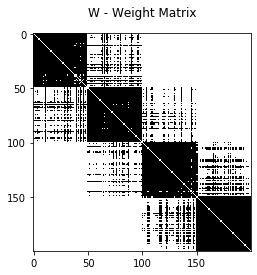

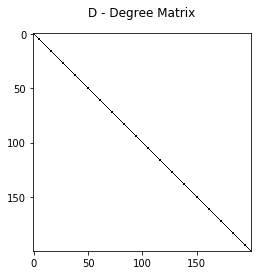

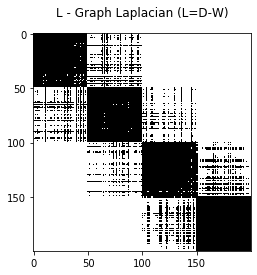

Output of KMeans Clustering


array([[-5.41094244e-02,  1.44212874e-03,  8.34929969e-02,
        -9.66668333e-02],
       [-5.41094244e-02,  1.44212874e-03,  8.34929972e-02,
         9.86001697e-02],
       [-1.19858344e-01,  1.86140034e-03, -7.77089171e-02,
         1.22730054e-10],
       [-2.66112511e-03, -1.41394496e-01,  7.17630470e-04,
         2.71212490e-21]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

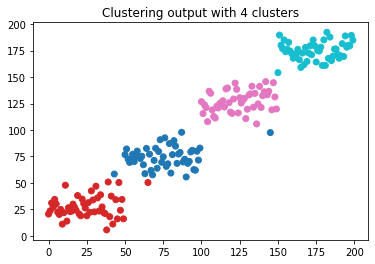

In [47]:
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Parameters

k=4 #Number of clusters (segments of graphs to create)

#Functions 
def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

def createMatrices(x_list):
    n = len(x_list)
    W = sp.zeros((n,n)) ## TODO: Is there symmetric/sparse matrix handling built in?
    L = sp.zeros((n,n))
    D = sp.zeros((n,n)) ## TODO: Is diagnoal Matrix handling built in?
    for i in range(n):
        d = 0
        for j in range(n):
            if i==j:
                W[i,j] = 0
            else:
                x = similarity(x_list[i],x_list[j])
                W[i,j] = x
                W[j,i] = x
                L[i,j] = -x
                L[j,i] = -x
                d += x
        D[i,i] = d
        L[i,i] = d
    return L,W,D


#Initialize Graph Vertices
x_list = sp.random.normal(25,10,50)
x_list_2 = sp.random.normal(75,10,50)
x_list_3 = sp.random.normal(125,10,50)
x_list_4 = sp.random.normal(175,10,50)
x_list = sp.concatenate([x_list,x_list_2,x_list_3,x_list_4])


#plot the vertices, and L,D,W matrices
plt.hist(x_list, bins=100)
plt.title("Distribution of elements of array")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
                  
L,W,D = createMatrices(x_list)

plt.spy(W)
plt.title("W - Weight Matrix")
plt.gca().xaxis.tick_bottom()
plt.show()

plt.spy(D)
plt.title("D - Degree Matrix")
plt.gca().xaxis.tick_bottom()
plt.show()

plt.spy(L)
plt.title("L - Graph Laplacian (L=D-W)")
plt.gca().xaxis.tick_bottom()
plt.show()


# eigen values and clustering
e_val,e_vec = linalg.eigh(L)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])

# plot output
print("Output of KMeans Clustering")
display(km.cluster_centers_)
display(km.labels_)

cmap=plt.get_cmap('tab10')
plt.scatter(range(e_vec.shape[0]),x_list,c=km.labels_, cmap=cmap)
plt.title("Clustering output with "+str(k)+" clusters")
plt.show()
plt.close()


Interesting observation:

if we dont use the first 'k' eigen vectors for kmeans, then the clustering performance becomes worse, the cluster memberss then seem to be randomly distributed rather than 'nicely bunched'. Is that a bug?  